In [32]:
import psycopg2
from src.features.text.tokenize import tokenize
from src.visualization import topics
from collections import defaultdict
from gensim import corpora, models
import os
#import pyLDAvis.gensim
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
corpus = corpora.MmCorpus(os.environ['MODEL_PATH'] + 'articles.mm')
dictionary = corpora.Dictionary.load(os.environ['MODEL_PATH'] + 'articles.dict')
num_topics = 10

In [34]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, alpha="auto", eta=0.01)

/Users/claasmeiners/.virtualenvs/video_article_retrieval/lib/python3.5/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [35]:
lda.save(os.environ['MODEL_PATH'] + 'articles.lda')

In [36]:
#followers_data =  pyLDAvis.gensim.prepare(lda, corpus, dictionary)
#pyLDAvis.display(followers_data)

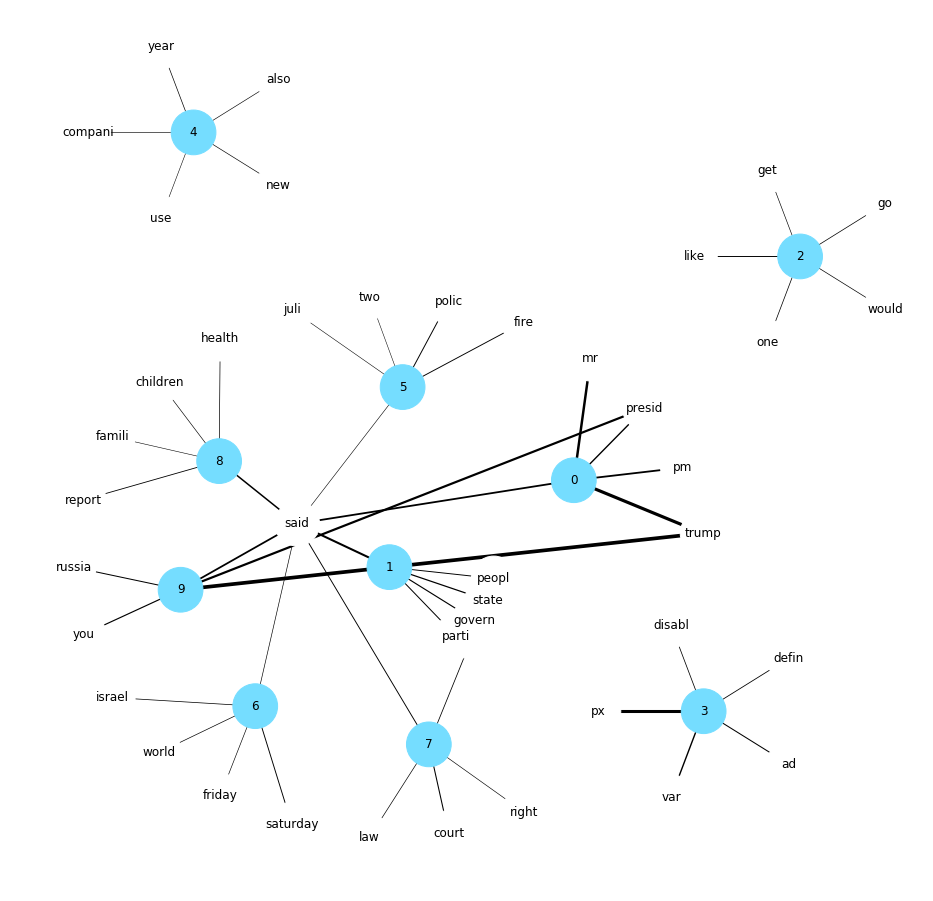

In [37]:
plt.figure(figsize=(16,16))

topics.topic_network_graph(lda, dictionary, num_topics)

plt.axis('off')
#plt.savefig('lda_network_graph.pdf', format="pdf",bbox_inches='tight')
plt.show()